In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

# First Analysis & Cleaning Data

In [2]:
df = pd.read_csv('komo.csv')

In [3]:
df = df.drop('Unnamed: 0', axis = 1)

In [4]:
df

,Year,Modle,KM,Hand,CM,Color,Area,Gearbox,Price,IsNew,IsSaved,WithoutAccidents
0,2007,מאזדה 5,200000,2,2000,לבן מטאלי,אזור רמת גן - גבעתיים,אוטומטית,29500.0,0,1,0
1,2010,מאזדה 3,100000,2,2000,אפור מטאלי,אזור חיפה וחוף הכרמל,רובוטית,36000.0,1,1,1
2,2012,מאזדה 5,168000,1,1999,שחור,אזור מושבים בשרון,אוטומטית,47000.0,0,1,0
3,2020,מאזדה 3,33000,2,2000,כחול כהה מטאלי,אזור רמת גן - גבעתיים,אוטומטית,121000.0,0,1,1
4,2012,מאזדה 3,148000,2,2000,שחור,אזור בקעת אונו,אוטומטית,37500.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4395,2016,פיאט 500,44000,2,1242,סגול מטאלי,אזור חיפה וחוף הכרמל,אוטומטית,40000.0,0,1,0
4396,2015,פיאט 500,90100,2,1242,תכלת,אזור באר שבע והסביבה,רובוטית,30000.0,0,0,1
4397,2017,פיאט 500X,82000,2,1368,אדום,אזור מושבים בשפלה,אוטומטית,63000.0,0,1,0
4398,2010,פיאט פונטו,172000,2,1242,לבן,אזור תל אביב,ידנית,9999.0,1,0,0


In [5]:
df[df['Price'].isnull() == True]

,Year,Modle,KM,Hand,CM,Color,Area,Gearbox,Price,IsNew,IsSaved,WithoutAccidents
60,2015,מאזדה 3,43000,3,1998,אדום,אזור חיפה וחוף הכרמל,אוטומטית,NaN,0,1,0
63,2003,מאזדה 323,190000,3,1598,חום,אזור מושבים בצפון,אוטומטית,NaN,1,0,0
78,2004,מאזדה 6,184000,3,2261,כסוף מטאלי,אזור כרמיאל והסביבה,אוטומטית,NaN,1,1,0
79,2009,מאזדה 2,185000,2,1498,סגול חציל,אזור ירושלים והסביבה,אוטומטית,NaN,0,1,0
80,2018,מאזדה 2,44000,1,1496,לבן פנינה,אזור רעננה - כפר סבא,אוטומטית,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4376,2019,פיאט 500,31000,1,1242,שחור,אזור בקעת אונו,אוטומטית,NaN,0,1,1
4386,2010,פיאט פנדה,187566,4,1242,לבן שנהב,אזור עכו - נהריה,ידנית,NaN,0,1,0
4389,2013,פיאט פנדה,110000,3,1242,אדום,אזור פתח תקוה והסביבה,ידנית,NaN,1,0,1
4391,2016,פיאט 500,83000,2,1242,בורדו מטאלי,אזור נס ציונה - רחובות,אוטומטית,NaN,0,1,0


In [6]:
df.isnull().sum()

Year                  0
Modle                 0
KM                    0
Hand                  0
CM                    0
Color                 0
Area                  0
Gearbox               0
Price               362
IsNew                 0
IsSaved               0
WithoutAccidents      0
dtype: int64

In [7]:
df = df.dropna(how = 'any', axis = 0)

In [8]:
df.isnull().sum()

Year                0
Modle               0
KM                  0
Hand                0
CM                  0
Color               0
Area                0
Gearbox             0
Price               0
IsNew               0
IsSaved             0
WithoutAccidents    0
dtype: int64

In [9]:
df.shape

(4038, 12)

In [10]:
numericDF = df.copy()

In [11]:
numericDF['Modle'] = LabelEncoder().fit_transform(numericDF['Modle'])
numericDF['Color'] = LabelEncoder().fit_transform(numericDF['Color'])
numericDF['Area'] = LabelEncoder().fit_transform(numericDF['Area'])
numericDF['Gearbox'] = LabelEncoder().fit_transform(numericDF['Gearbox'])

In [12]:
numericDF

,Year,Modle,KM,Hand,CM,Color,Area,Gearbox,Price,IsNew,IsSaved,WithoutAccidents
0,2007,76,200000,2,2000,35,33,0,29500.0,0,1,0
1,2010,74,100000,2,2000,3,12,2,36000.0,1,1,1
2,2012,76,168000,1,1999,46,23,0,47000.0,0,1,0
3,2020,74,33000,2,2000,28,33,0,121000.0,0,1,1
4,2012,74,148000,2,2000,46,5,0,37500.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4395,2016,180,44000,2,1242,40,12,0,40000.0,0,1,0
4396,2015,180,90100,2,1242,49,3,2,30000.0,0,0,1
4397,2017,182,82000,2,1368,0,22,0,63000.0,0,1,0
4398,2010,187,172000,2,1242,34,36,1,9999.0,1,0,0


In [13]:
#Saving the DataFreame
#numericDF.to_csv("NumericKomo.csv")

In [14]:
numericDF.iloc[9,3] = 1

In [15]:
numericDF['Hand'].value_counts().sort_index()

1      810
2     1485
3     1105
4      376
5      160
6       49
7       24
8       10
9        4
10      15
Name: Hand, dtype: int64

# Visualization

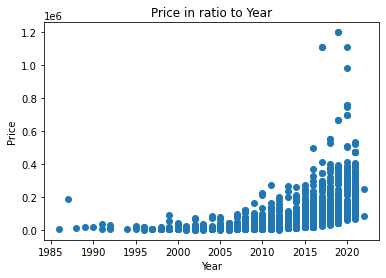

In [16]:
priceAndYears = plt.figure()
colormap = np.array(['b', 'r'])
ax = plt.axes()
#c=colormap[numericDF.Gearbox]
ax.scatter(numericDF.Year, numericDF.Price)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price in ratio to Year')
plt.show()

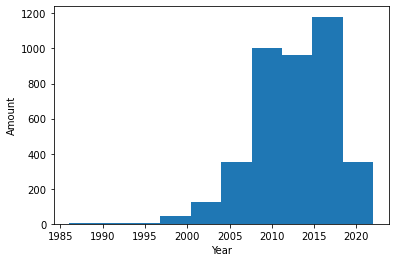

In [27]:
""" Figure 1 """
# Creating a histogram
#plt.title("The number of hands")
plt.hist(df.Year)
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

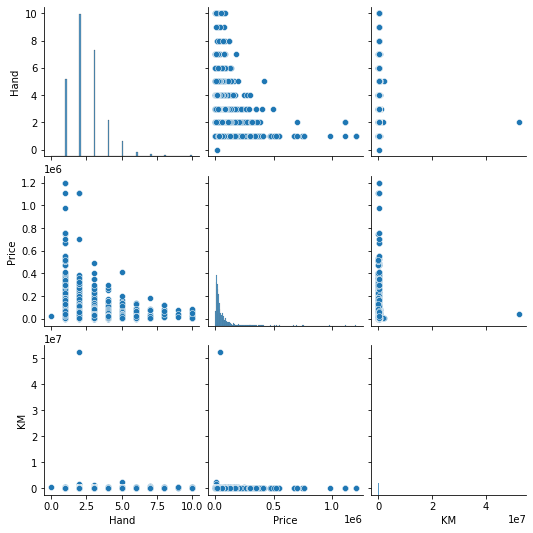

In [28]:
""" Figure 2 """
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df[['Hand','Price','KM']])

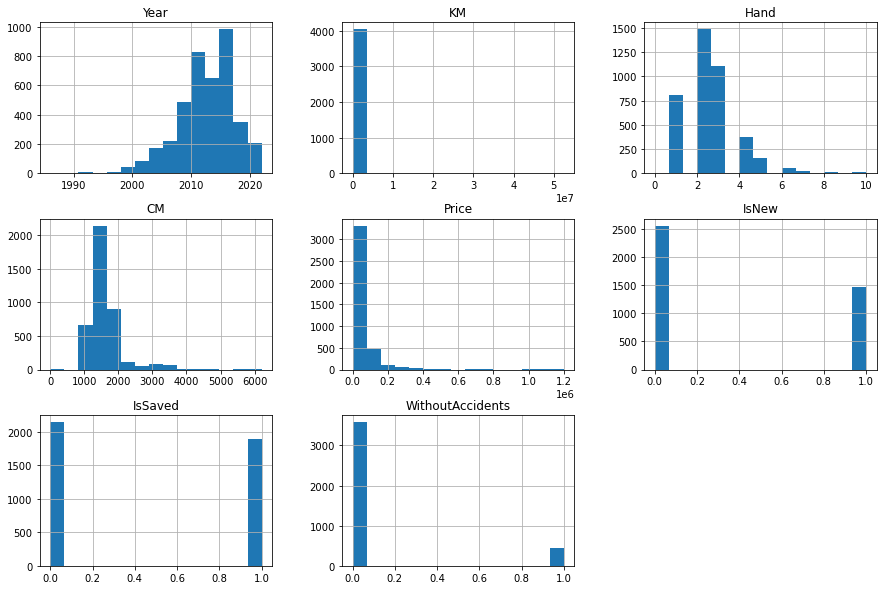

In [29]:
""" Figure 3 """
df.hist(bins=15, figsize=(15,10));

<AxesSubplot:title={'center':'Hand'}>

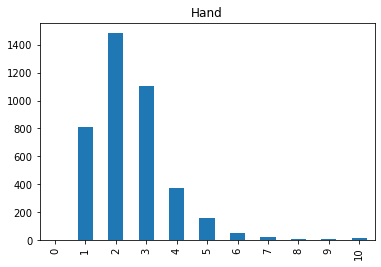

In [31]:
""" Figure 4 """
df['Hand'].value_counts().sort_index().plot(kind='bar',title='Hand')

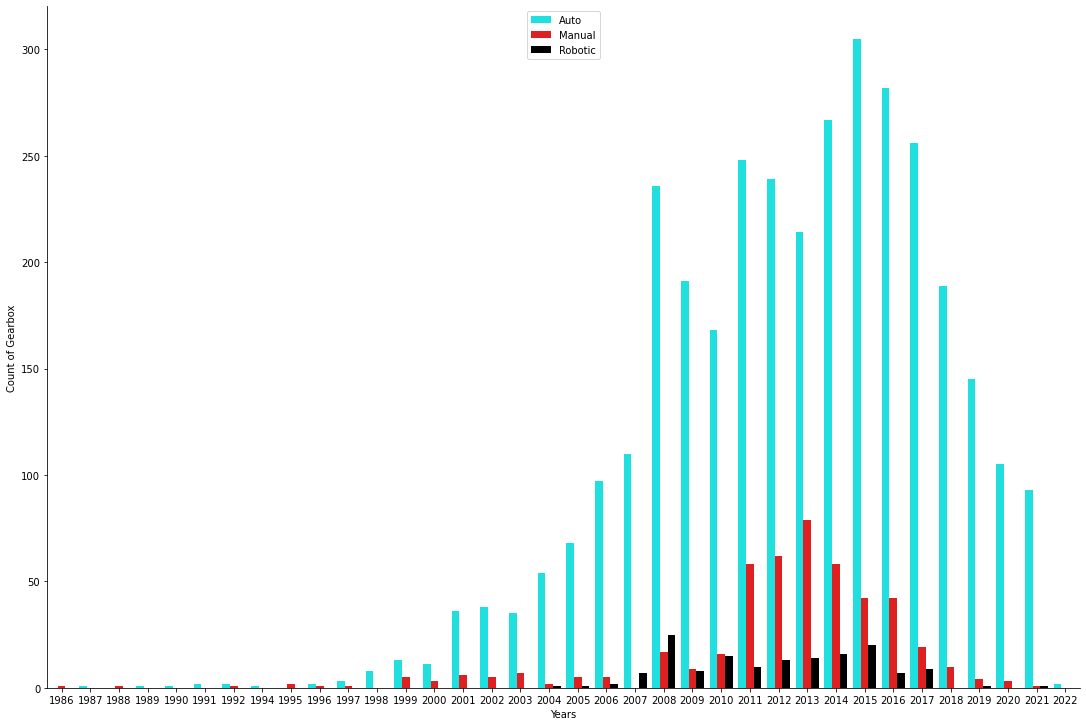

In [17]:
GearboxAndYears = sns.catplot(
    x='Year', 
    data=numericDF,
    kind='count', 
    hue='Gearbox',
    palette=["cyan", "red", "black"], 
    height=10, 
    aspect=1.5,
    legend=False,
    ).set_axis_labels('Years', 'Count of Gearbox')
GearboxAndYears.ax.legend(labels=['Auto','Manual', 'Robotic'])
#plt.savefig('Gearbox&Years.png')

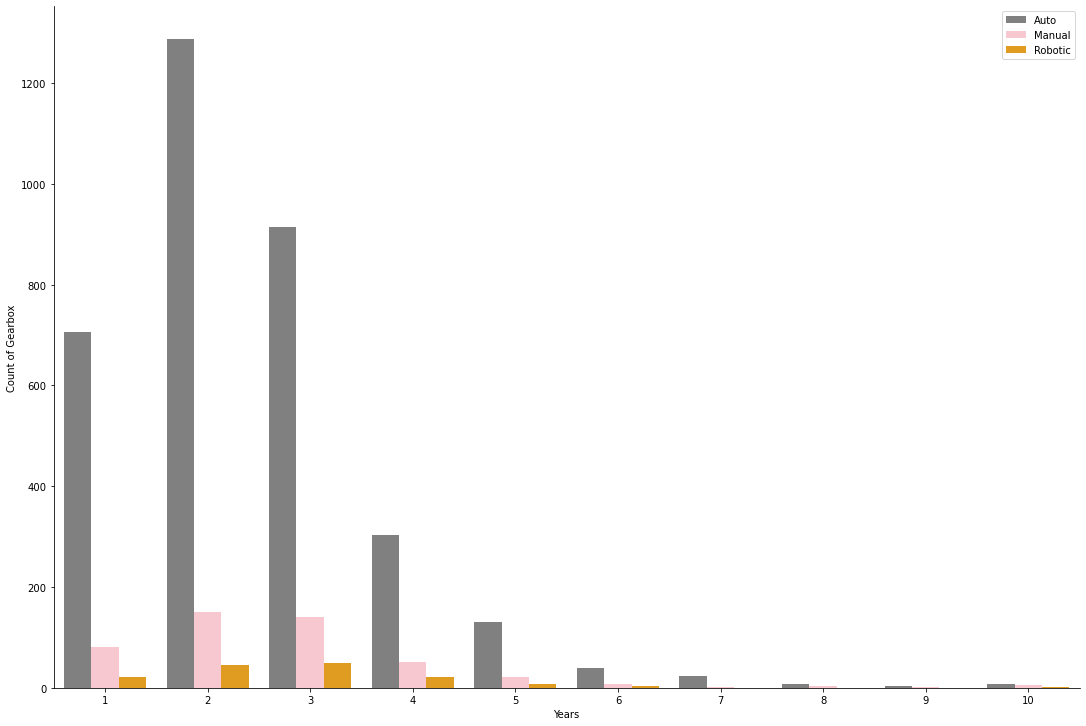

In [18]:
GearboxAndHand = sns.catplot(
    x='Hand', 
    data=numericDF,
    kind='count', 
    hue='Gearbox',
    palette=["gray", "pink", "orange"], 
    height=10, 
    aspect=1.5,
    legend=False,
    ).set_axis_labels('Years', 'Count of Gearbox')
GearboxAndHand.ax.legend(labels=["Auto", "Manual", "Robotic"])
#plt.savefig('Gearbox&Hand.png')

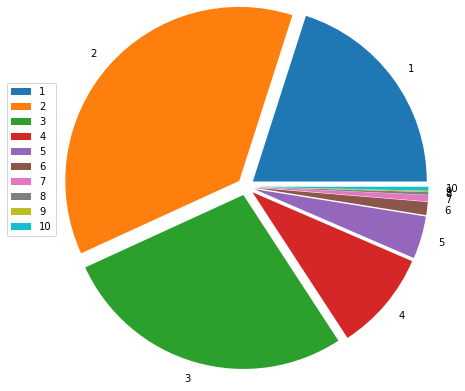

In [19]:
handArr = np.array(numericDF['Hand'].value_counts().sort_index())
myexplode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
mylabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
plt.pie(handArr, explode= myexplode, labels=mylabels, radius=2)
plt.legend(bbox_to_anchor=(-0.35,1.000))
plt.show()
#plt.savefig('PieHands.png')

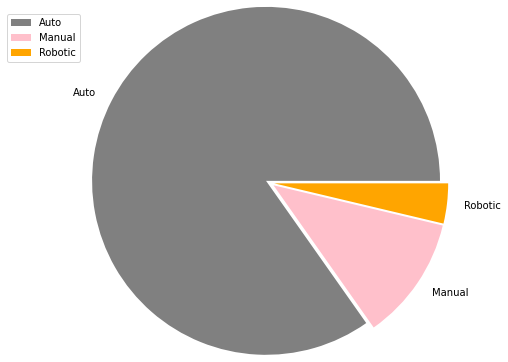

In [20]:
GearboxArr = np.array(numericDF['Gearbox'].value_counts().sort_index())
myexplode = [0.05, 0.05, 0.05]
mylabels = ['Auto', 'Manual', 'Robotic']
colors = ['gray','pink','orange']
plt.pie(GearboxArr, explode= myexplode, labels=mylabels, radius=2, colors = colors)
plt.legend(bbox_to_anchor=(-0.35,1.3))
plt.show()
#plt.savefig('PieGearbox.png')

# Supervised Learning

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [22]:
X = numericDF.copy()
y = X['Gearbox']
X = X.drop('Gearbox', axis = 1)

In [23]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2)

In [24]:
X

,Year,Modle,KM,Hand,CM,Color,Area,Price,IsNew,IsSaved,WithoutAccidents
0,2007,76,200000,2,2000,35,33,29500.0,0,1,0
1,2010,74,100000,2,2000,3,12,36000.0,1,1,1
2,2012,76,168000,1,1999,46,23,47000.0,0,1,0
3,2020,74,33000,2,2000,28,33,121000.0,0,1,1
4,2012,74,148000,2,2000,46,5,37500.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4395,2016,180,44000,2,1242,40,12,40000.0,0,1,0
4396,2015,180,90100,2,1242,49,3,30000.0,0,0,1
4397,2017,182,82000,2,1368,0,22,63000.0,0,1,0
4398,2010,187,172000,2,1242,34,36,9999.0,1,0,0


In [25]:
clf1 = tree.DecisionTreeClassifier()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()
clf4 = KNeighborsClassifier(n_neighbors=10)

algoName = ["Decision Tree", "Random Forest", "Native Bayes", "KNN"]

for idx, clf in enumerate([clf1, clf2, clf3, clf4]):
    clf.fit(XTrain, yTrain)
    
    ypred = clf.predict(XTest)
    ypredTrain = clf.predict(XTrain)
    
    print(algoName[idx])
    print(f"Accuracy on train for algorithem is: {metrics.accuracy_score(y_true=yTrain, y_pred=ypredTrain)}")
    print(f"Accuracy on test for algorithem is: {metrics.accuracy_score(y_true=yTest, y_pred=ypred)}")
    print("Confusion Matrix is:")
    print(metrics.confusion_matrix(yTest, ypred))
    print("===================================")

Decision Tree
Accuracy on train for algorithem is: 1.0
Accuracy on test for algorithem is: 0.8452970297029703
Confusion Matrix is:
[[622  35  13]
 [ 53  47   5]
 [ 14   5  14]]
Random Forest
Accuracy on train for algorithem is: 1.0
Accuracy on test for algorithem is: 0.8836633663366337
Confusion Matrix is:
[[658  11   1]
 [ 60  45   0]
 [ 18   4  11]]
Native Bayes
Accuracy on train for algorithem is: 0.4653250773993808
Accuracy on test for algorithem is: 0.4603960396039604
Confusion Matrix is:
[[274 396   0]
 [  7  98   0]
 [  2  31   0]]
KNN
Accuracy on train for algorithem is: 0.8582043343653251
Accuracy on test for algorithem is: 0.8254950495049505
Confusion Matrix is:
[[662   8   0]
 [100   5   0]
 [ 30   3   0]]


# The best algorithem for our project

In [26]:
parameters = {'n_estimators':range(50,551,100) }
bestClf = RandomForestClassifier()

clf = GridSearchCV(bestClf, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
clf.fit(XTrain, yTrain)

print("best parameter set is:",clf.best_params_)
print("#####################")
print('Accuracy on test data: ', metrics.accuracy_score(y_true = yTest, y_pred = ypred))
print("#####################")
print('Accuracy:', clf.best_score_)
print("#####################")
print('Confusion Matrix: ')
print(metrics.confusion_matrix(y_true = yTest, y_pred = ypred))

best parameter set is: {'n_estimators': 350}
#####################
Accuracy on test data:  0.8254950495049505
#####################
Accuracy: 0.9099071207430341
#####################
Confusion Matrix: 
[[662   8   0]
 [100   5   0]
 [ 30   3   0]]
